# Auto-Encoders

In [85]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
%matplotlib inline

from sklearn.model_selection import train_test_split
import tensorflow as tf
from sklearn.utils import shuffle

In [86]:
C170_dat, F170_dat = np.load('data_old/C_170keV.npy'), np.load('data_old/F_170keV.npy')

In [87]:
data, labels = [],[]
Csum, Fsum = [],[]

for i in range(len(C170_dat)):
    data.append(C170_dat[i])
    labels.append(1)
    Csum.append(np.sum(C170_dat[i]))

for i in range(len(F170_dat)):
    data.append(F170_dat[i])
    labels.append(0)
    Fsum.append(np.sum(F170_dat[i]))

In [88]:
data -= np.mean(data)
data/=np.std(data)

In [89]:
train_data, test_data, train_labels, test_labels = train_test_split(np.expand_dims(data,axis=-1), labels, test_size=0.3, random_state=42)

In [90]:
# np.max(train_data[1])

In [91]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Flatten, Dense, Conv2D, MaxPooling2D, LeakyReLU, Dropout, Activation, \
UpSampling2D, Conv2DTranspose

In [92]:
# def nr_model():
#     nr_model = Sequential([
#         Conv2D(2, kernel_size=(3,3), input_shape=(97,97,1), activation='relu'),
#         Flatten(),
#         Dense(2, activation='softmax')
#     ], name='nr_model')
#     return nr_model


# model = nr_model()

In [93]:
def ae_model():

    ae_model = Sequential()

    ae_model.add(Conv2D(16, (3, 3), padding='valid', input_shape=(97,97,1)))
    ae_model.add(Activation('relu'))
    ae_model.add(MaxPooling2D(pool_size=(2,2)))

    ae_model.add(Conv2D(2,(3, 3), padding='valid')) # apply 2 filters sized of (3x3)
    ae_model.add(Activation('relu'))
    ae_model.add(MaxPooling2D(pool_size=(2,2)))

    #encoding is here
    
    ae_model.add(Conv2DTranspose(2,(3, 3), padding='valid')) # apply 2 filters sized of (3x3)
    ae_model.add(Activation('relu'))
    ae_model.add(UpSampling2D((2, 2)))

    ae_model.add(Conv2DTranspose(16,(3, 3), padding='valid'))
    ae_model.add(Activation('relu'))
    ae_model.add(UpSampling2D((2, 2)))

    ae_model.add(Conv2D(1,(4, 4), padding='valid'))
    ae_model.add(Activation('sigmoid'))
    
    return ae_model
    
model = ae_model()

In [94]:
model.summary()

Model: "sequential_11"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_31 (Conv2D)           (None, 95, 95, 16)        160       
_________________________________________________________________
activation_57 (Activation)   (None, 95, 95, 16)        0         
_________________________________________________________________
max_pooling2d_18 (MaxPooling (None, 47, 47, 16)        0         
_________________________________________________________________
conv2d_32 (Conv2D)           (None, 45, 45, 2)         290       
_________________________________________________________________
activation_58 (Activation)   (None, 45, 45, 2)         0         
_________________________________________________________________
max_pooling2d_19 (MaxPooling (None, 22, 22, 2)         0         
_________________________________________________________________
conv2d_transpose_22 (Conv2DT (None, 24, 24, 2)       

In [95]:
model.compile(optimizer='adadelta', loss='binary_crossentropy')
model.fit(train_data, train_data, epochs=3, validation_data=(test_data, test_data))

Epoch 1/3
219/219 [==============================] - 2s 9ms/step - loss: 0.6981 - val_loss: 0.6970
Epoch 2/3
219/219 [==============================] - 2s 7ms/step - loss: 0.6965 - val_loss: 0.6953
Epoch 3/3
219/219 [==============================] - 2s 7ms/step - loss: 0.6948 - val_loss: 0.6934


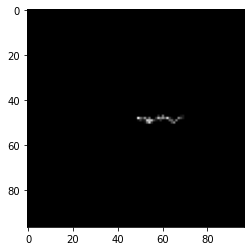

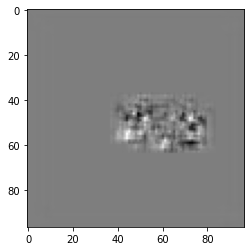

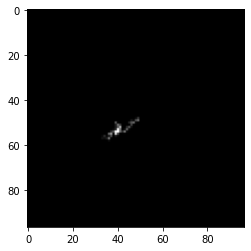

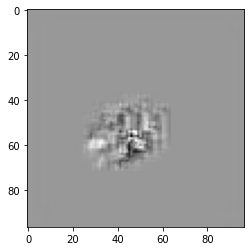

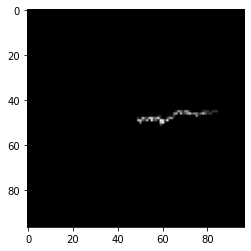

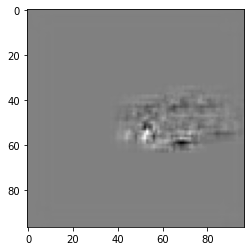

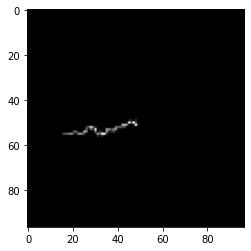

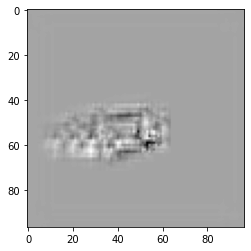

In [96]:
gen_images = model.predict(test_data)
 
for i in range(4):
    plt.imshow(test_data[i].reshape(97, 97)), plt.gray(), plt.show()
    plt.imshow(gen_images[i].reshape(97, 97)), plt.gray(), plt.show()

In [97]:
np.save('Figure_Data/fig3_testdata1', test_data[3])
np.save('Figure_Data/fig3_genimg1', gen_images[3])

In [98]:
model = ae_model()

In [99]:
model.compile(optimizer=tf.keras.optimizers.Adadelta(learning_rate=0.01), loss='mean_squared_error')
model.fit(train_data, train_data, epochs=10, validation_data=(test_data, test_data))

Epoch 1/10
219/219 [==============================] - 2s 9ms/step - loss: 1.2571 - val_loss: 1.2614
Epoch 2/10
219/219 [==============================] - 2s 7ms/step - loss: 1.2401 - val_loss: 1.2544
Epoch 3/10
219/219 [==============================] - 2s 7ms/step - loss: 1.2425 - val_loss: 1.2453
Epoch 4/10
219/219 [==============================] - 2s 7ms/step - loss: 1.2205 - val_loss: 1.2263
Epoch 5/10
219/219 [==============================] - 2s 7ms/step - loss: 1.1992 - val_loss: 1.1620
Epoch 6/10
219/219 [==============================] - 2s 7ms/step - loss: 1.1224 - val_loss: 1.0636
Epoch 7/10
219/219 [==============================] - 2s 7ms/step - loss: 1.0261 - val_loss: 0.9859
Epoch 8/10
219/219 [==============================] - 2s 7ms/step - loss: 0.9621 - val_loss: 0.9529
Epoch 9/10
219/219 [==============================] - 2s 7ms/step - loss: 0.9326 - val_loss: 0.9395
Epoch 10/10
219/219 [==============================] - 2s 7ms/step - loss: 0.9298 - val_loss: 0.9329

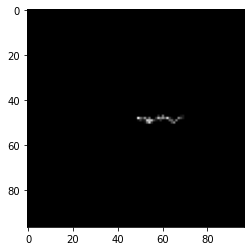

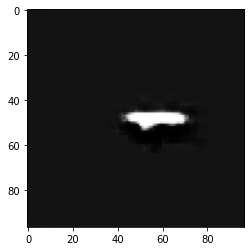

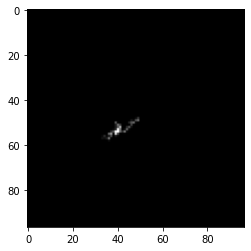

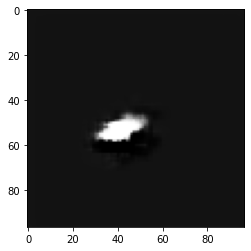

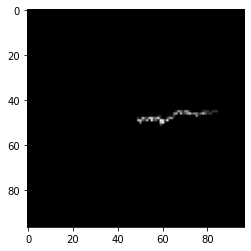

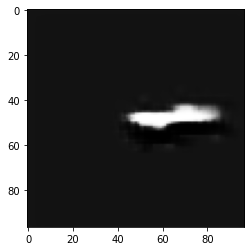

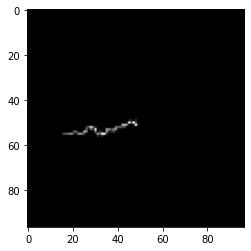

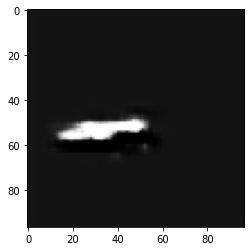

In [100]:
gen_images = model.predict(test_data)
 
for i in range(4):
    plt.imshow(test_data[i].reshape(97, 97)), plt.gray(), plt.show()
    plt.imshow(gen_images[i].reshape(97, 97)), plt.gray(), plt.show()

In [101]:
np.save('Figure_Data/fig3_testdata2', test_data[3])
np.save('Figure_Data/fig3_genimg2', gen_images[3])

In [16]:
import keras.backend as K

#function means input goes into the first layer of the model and output is the compressed layer of the model
#function can then be applied to any data with 97x97x1

encoding_lay = 5
encod_func = K.function([model.layers[0].input], [model.layers[encoding_lay].output])
encoding = encod_func([test_data])[0]
 
#flatten compressed representation to 1 dimensional array
encoding = encoding.reshape(3000,22*22*2)

In [17]:
np.shape(encoding)

(3000, 968)

In [18]:
from sklearn.cluster import KMeans

km = KMeans(
    n_clusters=2, init='random',
    n_init=10, max_iter=300, 
    tol=1e-04, random_state=0
)


y_km = km.fit_predict(encoding)

In [19]:
np.shape(y_km)

(3000,)

In [20]:
np.shape(test_labels)

(3000,)

In [21]:
test_labels

[0,
 1,
 1,
 1,
 1,
 0,
 1,
 0,
 0,
 1,
 1,
 0,
 0,
 0,
 1,
 0,
 1,
 0,
 0,
 0,
 0,
 1,
 1,
 0,
 1,
 0,
 1,
 0,
 0,
 0,
 1,
 1,
 1,
 1,
 0,
 1,
 0,
 1,
 1,
 0,
 0,
 1,
 0,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 0,
 1,
 0,
 1,
 0,
 1,
 1,
 1,
 0,
 0,
 1,
 1,
 0,
 1,
 0,
 0,
 1,
 0,
 1,
 1,
 1,
 1,
 0,
 1,
 0,
 0,
 1,
 0,
 1,
 0,
 1,
 0,
 1,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 1,
 0,
 0,
 0,
 0,
 1,
 0,
 1,
 0,
 0,
 1,
 1,
 0,
 0,
 1,
 0,
 0,
 1,
 1,
 0,
 1,
 0,
 1,
 1,
 1,
 0,
 1,
 0,
 0,
 1,
 1,
 1,
 1,
 0,
 1,
 0,
 1,
 1,
 0,
 0,
 0,
 1,
 0,
 1,
 0,
 1,
 0,
 0,
 1,
 0,
 0,
 0,
 1,
 1,
 1,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 1,
 0,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 0,
 0,
 0,
 1,
 1,
 0,
 0,
 0,
 1,
 1,
 1,
 0,
 1,
 0,
 0,
 1,
 0,
 1,
 0,
 0,
 1,
 0,
 1,
 1,
 0,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 0,
 0,
 1,
 1,
 0,
 1,
 0,
 1,
 0,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 1,
 0,
 1,
 0,
 0,
 1,
 0,
 1,
 1,
 0,
 0,
 1,
 0,
 1,
 1,
 0,
 0,
 0,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 1,


In [22]:
y_km.tolist()

[0,
 1,
 0,
 1,
 0,
 0,
 0,
 1,
 0,
 1,
 0,
 0,
 1,
 1,
 0,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 0,
 0,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 0,
 0,
 1,
 1,
 1,
 1,
 0,
 0,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 0,
 0,
 1,
 1,
 0,
 1,
 1,
 1,
 0,
 0,
 0,
 1,
 0,
 0,
 1,
 0,
 0,
 1,
 1,
 0,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 0,
 1,
 1,
 0,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 1,
 1,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 1,
 0,
 0,
 1,
 0,
 1,
 1,
 0,
 1,
 0,
 1,
 0,
 0,
 1,
 0,
 0,
 1,
 0,
 1,
 1,
 0,
 1,
 0,
 1,
 1,
 0,
 0,
 1,
 0,
 1,
 1,
 1,
 0,
 0,
 1,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 1,
 0,
 0,
 1,
 1,
 0,
 0,
 0,
 1,
 1,
 1,
 1,
 1,
 0,
 0,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 0,
 1,
 1,
 0,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 0,
 0,
 1,
 1,
 0,
 1,
 1,
 0,
 0,
 1,
 1,
 0,
 1,
 0,
 0,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 0,
 0,
 0,
 0,
 1,
 1,
 1,
 1,
 0,
 0,
 1,
 0,
 1,
 0,
 1,
 0,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 0,


In [23]:
from sklearn.metrics import accuracy_score
accuracy_score(y_km.tolist(), test_labels)

0.48833333333333334

### Trying something different

In [102]:
# def ae_model():

#     ae_model = Sequential()

#     #1st convolution layer
#     ae_model.add(Conv2D(16, (3, 3), padding='valid', input_shape=(97,97,1)))
#     ae_model.add(Activation('relu'))

#     #2nd convolution layer
#     ae_model.add(Conv2D(8,(3, 3), padding='valid')) 
#     ae_model.add(Activation('relu'))
    
#     #3rd convolution layer
#     ae_model.add(Conv2D(2,(3, 3), padding='valid')) # apply 2 filters sized of (3x3)
#     ae_model.add(Activation('relu'))

#     #4th convolution layer
#     ae_model.add(Conv2D(2,(3, 3), padding='valid')) # apply 2 filters sized of (3x3)
#     ae_model.add(Activation('relu'))

#     #5th convolution layer
#     ae_model.add(Conv2D(8,(3, 3), padding='valid'))
#     ae_model.add(Activation('relu'))
    
#     #6th convolution layer
#     ae_model.add(Conv2D(16,(3, 3), padding='valid'))
#     ae_model.add(Activation('relu'))
    
#     #6th convolution layer
#     ae_model.add(Conv2D(16,(3, 3), padding='valid'))
#     ae_model.add(Activation('relu'))
    
#     return ae_model
    
# model = ae_model()

In [103]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Flatten, Dense, Conv2D, MaxPooling2D, LeakyReLU, Dropout, Activation, \
UpSampling2D, Conv2DTranspose, Reshape

def ae_model():

    ae_model = Sequential()

    ae_model.add(Conv2D(16, (3, 3), padding='valid', input_shape=(97,97,1)))
    ae_model.add(Activation('relu'))

    ae_model.add(Conv2D(8,(3, 3), padding='valid')) 
    ae_model.add(Activation('relu'))
    
    ae_model.add(Flatten())

    ae_model.add(Dense(20))
    ae_model.add(Activation('relu'))
    
    #encoding here
    
    ae_model.add(Dense(93*93*8))
    ae_model.add(Activation('relu'))
    
    ae_model.add(Reshape((93,93,8)))
    
    ae_model.add(Conv2DTranspose(8,(3, 3), padding='valid')) 
    ae_model.add(Activation('relu'))
    
    ae_model.add(Conv2DTranspose(1, (3, 3), padding='valid', input_shape=(97,97,1)))
    ae_model.add(Activation('relu'))
    
    
    return ae_model
    
model = ae_model()

In [104]:
model.summary()

Model: "sequential_13"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_37 (Conv2D)           (None, 95, 95, 16)        160       
_________________________________________________________________
activation_67 (Activation)   (None, 95, 95, 16)        0         
_________________________________________________________________
conv2d_38 (Conv2D)           (None, 93, 93, 8)         1160      
_________________________________________________________________
activation_68 (Activation)   (None, 93, 93, 8)         0         
_________________________________________________________________
flatten_2 (Flatten)          (None, 69192)             0         
_________________________________________________________________
dense_4 (Dense)              (None, 20)                1383860   
_________________________________________________________________
activation_69 (Activation)   (None, 20)              

In [105]:
model.compile(optimizer=tf.keras.optimizers.Adadelta(learning_rate=0.1), loss='mean_squared_error')
model.fit(train_data, train_data, epochs=15, validation_data=(test_data, test_data))

Epoch 1/15
219/219 [==============================] - 3s 12ms/step - loss: 0.9975 - val_loss: 1.0093
Epoch 2/15
219/219 [==============================] - 2s 10ms/step - loss: 0.9853 - val_loss: 0.8495
Epoch 3/15
219/219 [==============================] - 2s 10ms/step - loss: 0.7726 - val_loss: 0.6423
Epoch 4/15
219/219 [==============================] - 2s 10ms/step - loss: 0.6036 - val_loss: 0.5629
Epoch 5/15
219/219 [==============================] - 2s 10ms/step - loss: 0.5363 - val_loss: 0.5208
Epoch 6/15
219/219 [==============================] - 2s 10ms/step - loss: 0.4981 - val_loss: 0.4960
Epoch 7/15
219/219 [==============================] - 2s 10ms/step - loss: 0.4722 - val_loss: 0.4783
Epoch 8/15
219/219 [==============================] - 2s 10ms/step - loss: 0.4528 - val_loss: 0.4677
Epoch 9/15
219/219 [==============================] - 2s 10ms/step - loss: 0.4425 - val_loss: 0.4543
Epoch 10/15
219/219 [==============================] - 2s 10ms/step - loss: 0.4283 - val_lo

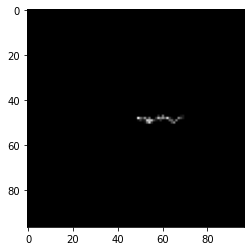

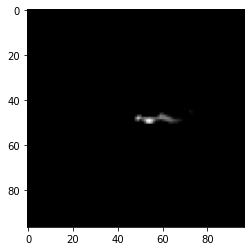

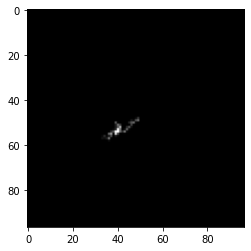

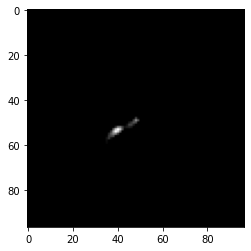

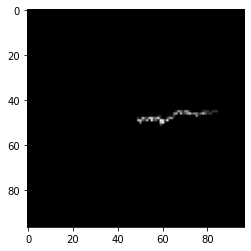

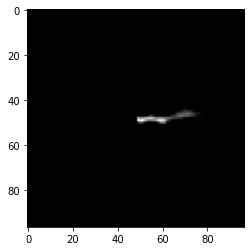

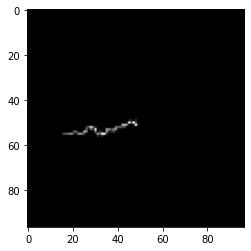

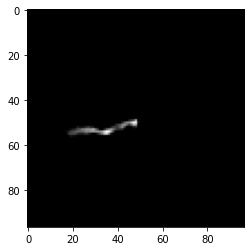

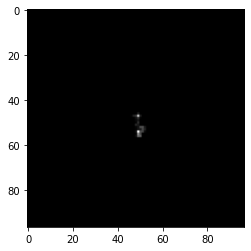

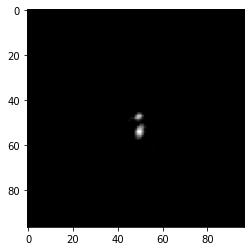

In [106]:
gen_images = model.predict(test_data)
 
for i in range(5):
    plt.imshow(test_data[i].reshape(97, 97)), plt.gray(), plt.show()
    plt.imshow(gen_images[i].reshape(97, 97)), plt.gray(), plt.show()

In [107]:
np.save('Figure_Data/fig3_testdata3', test_data[3])
np.save('Figure_Data/fig3_genimg3', gen_images[3])

In [108]:
import keras.backend as K

#function means input goes into the first layer of the model and output is the compressed layer of the model
#function can then be applied to any data with 97x97x1

encoding_lay = 5
encod_func = K.function([model.layers[0].input], [model.layers[encoding_lay].output])
encoding = encod_func([test_data])[0]
 
#flatten compressed representation to 1 dimensional array
encoding = encoding.reshape(3000,20)

2022-09-01 10:54:00.904852: W tensorflow/core/common_runtime/bfc_allocator.cc:248] Allocator (GPU_0_bfc) ran out of memory trying to allocate 3.96GiB with freed_by_count=0. The caller indicates that this is not a failure, but may mean that there could be performance gains if more memory were available.


In [109]:
from sklearn.cluster import KMeans

km = KMeans(n_clusters=2, init='random')

y_km = km.fit_predict(encoding)

In [110]:
np.shape(train_labels)

(7000,)

In [111]:
np.shape(y_km)

(3000,)

In [112]:
np.shape(test_labels)

(3000,)

In [113]:
from sklearn.metrics import accuracy_score
accuracy_score(y_km.tolist(), test_labels)

0.493

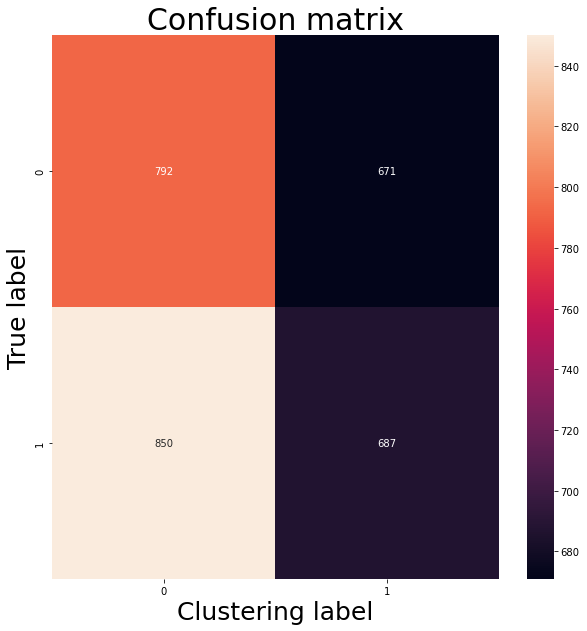

In [116]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

cm = confusion_matrix(test_labels, y_km)
plt.figure(figsize=(10, 10))
sns.heatmap(cm, annot=True, fmt="d")
plt.title("Confusion matrix", fontsize=30)
plt.ylabel('True label', fontsize=25)
plt.xlabel('Clustering label', fontsize=25)
plt.show()

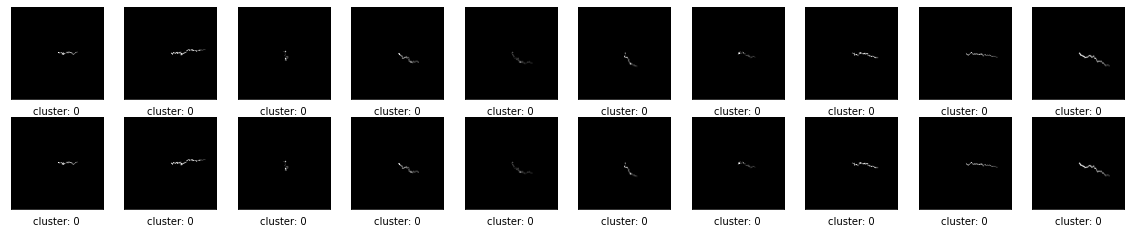

In [117]:
fig = plt.figure(figsize=(20,20))
for r in range(2):
    cluster = cm[r].argmax()
    for c, val in enumerate(test_data[y_km == cluster][0:10]):
        fig.add_subplot(10, 10, 10*r+c+1)
        plt.imshow(val.reshape((97,97)))
        plt.gray()
        plt.xticks([])
        plt.yticks([])
        plt.xlabel('cluster: '+str(cluster))
#         plt.ylabel('label: '+str(r))

Re-doing Plot

In [118]:
km = KMeans(n_clusters=2, init='random')

y_km = km.fit_predict(encoding)

Cluster: 1


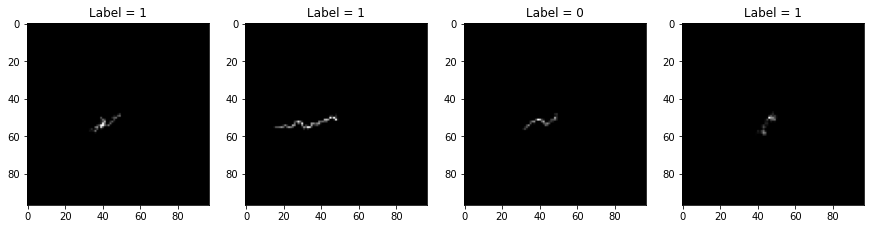

Cluster: 2


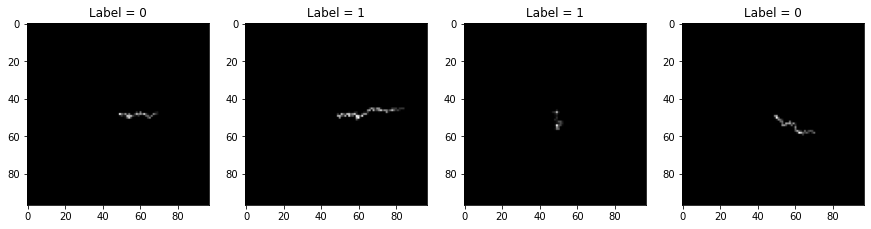

In [119]:
for k in range(2):
    print('Cluster:', k+1)
    fig, axs = plt.subplots(1,4, figsize=(15, 10), facecolor='w', edgecolor='k')
    for i in range(4):
        indx = np.where(y_km==k)[0][i]
        axs[i].imshow(test_data[indx].reshape(97, 97))
        label = test_labels[indx]
        axs[i].set_title("Label = " +str(label))
    plt.show()

## More clusters

### 5 Clusters

In [120]:
km = KMeans(n_clusters=5, init='random')

y_km = km.fit_predict(encoding)

In [121]:
np.shape(encoding)

(3000, 20)

In [122]:
np.shape(y_km)

(3000,)

In [123]:
y_km

array([4, 0, 4, ..., 1, 4, 1], dtype=int32)

In [124]:
# # fig, axs = plt.subplots(1,5, figsize=(15, 10), facecolor='w', edgecolor='k')

# for k in range(5):
#     print('Cluster:', k)
#     fig, axs = plt.subplots(1,4, figsize=(15, 10), facecolor='w', edgecolor='k')
#     for i in range(4):
#         indx = np.where(y_km==k)[0][i]
#         axs[i].imshow(test_data[indx].reshape(97, 97))
#     plt.show()

Cluster: 1


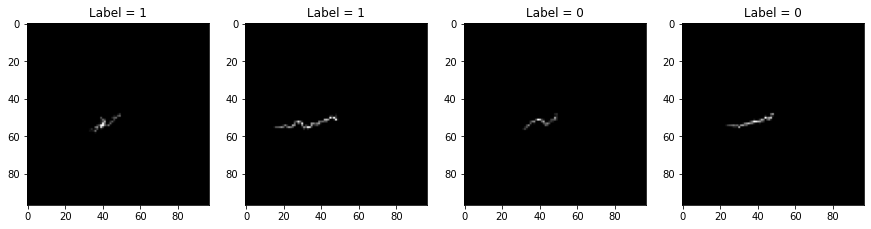

Cluster: 2


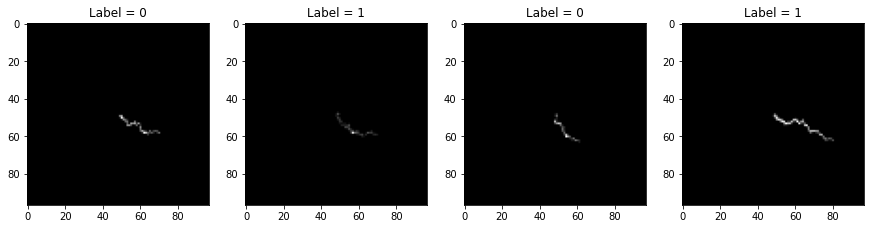

Cluster: 3


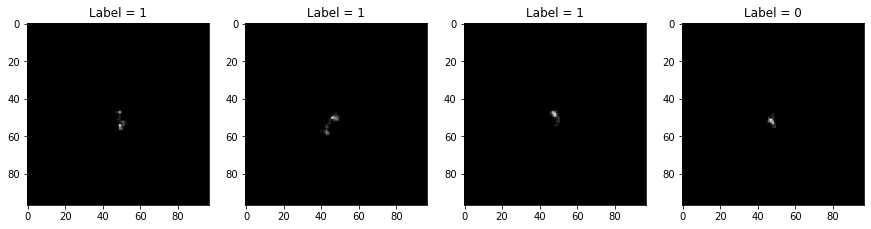

Cluster: 4


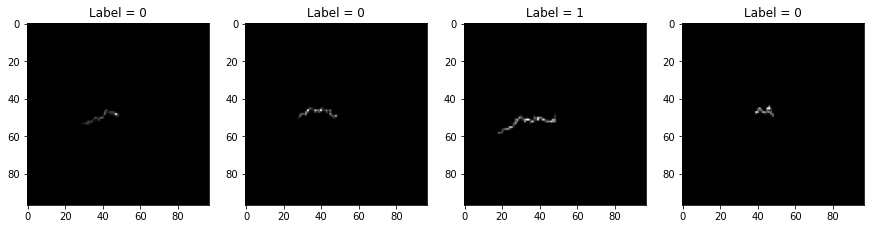

Cluster: 5


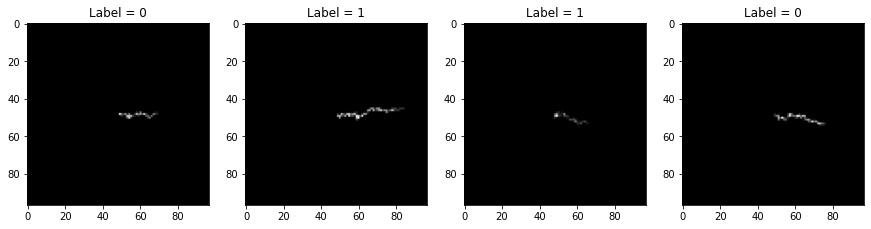

In [125]:
# fig, axs = plt.subplots(1,5, figsize=(15, 10), facecolor='w', edgecolor='k')

for k in range(5):
    print('Cluster:', k+1)
    fig, axs = plt.subplots(1,4, figsize=(15, 10), facecolor='w', edgecolor='k')
    for i in range(4):
        indx = np.where(y_km==k)[0][i]
        axs[i].imshow(test_data[indx].reshape(97, 97))
        label = test_labels[indx]
        axs[i].set_title("Label = " +str(label))
    plt.show()

### 3 Clusters

In [160]:
km = KMeans(n_clusters=3, init='random')

y_km = km.fit_predict(encoding)

In [170]:
for k in range(3):
    print('Cluster:', k+1)
    for i in range(5):
        indx = np.where(y_km==k)[0][i+80]
        np.save(f'Figure_Data/fig5_data/fig5_img{i}_cluster{k+1}',test_data[indx].reshape(97, 97))
        np.save(f'Figure_Data/fig5_data/fig5_label{i}_cluster{k+1}',test_labels[indx])

Cluster: 1
Cluster: 2
Cluster: 3


Cluster: 1


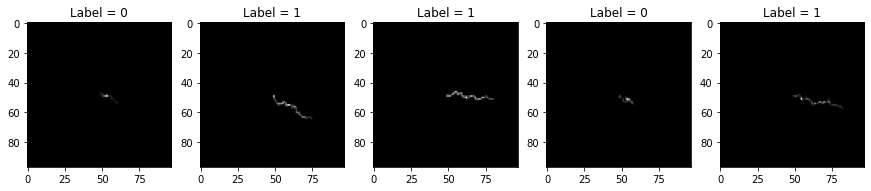

Cluster: 2


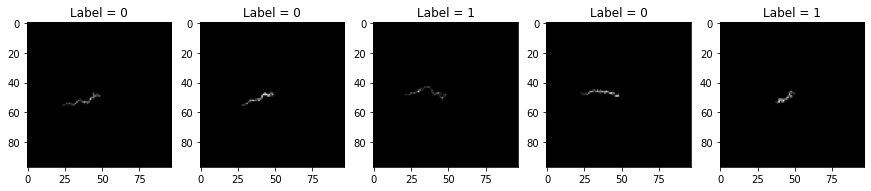

Cluster: 3


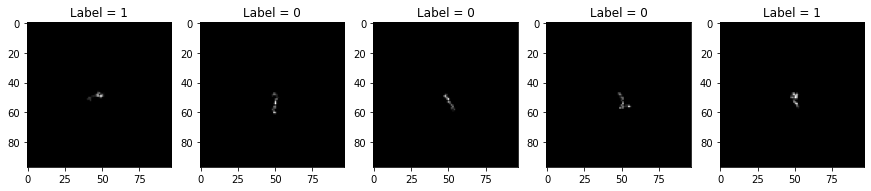

In [167]:
# fig, axs = plt.subplots(1,5, figsize=(15, 10), facecolor='w', edgecolor='k')

for k in range(3):
    print('Cluster:', k+1)
    fig, axs = plt.subplots(1,5, figsize=(15, 10), facecolor='w', edgecolor='k')
    for i in range(5):
        indx = np.where(y_km==k)[0][i+80]
        axs[i].imshow(test_data[indx].reshape(97, 97))
        label = test_labels[indx]
        axs[i].set_title("Label = " +str(label))
    plt.show()

## Principal Component Analysis

In [168]:
np.shape(encoding)

(3000, 20)

In [169]:
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
encoding = sc.fit_transform(encoding)

In [170]:
from sklearn.decomposition import PCA

pca = PCA(n_components=3,random_state=5)
pca_30 = pca.fit_transform(encoding)

In [171]:
explained_variance = pca.explained_variance_ratio_
print(explained_variance*100)

[14.046821  10.5961275  8.059061 ]


In [172]:
np.shape(pca_30)

(3000, 3)

In [173]:
from sklearn.cluster import KMeans

km = KMeans(n_clusters=2, init='random')

y_km = km.fit_predict(pca_30)

In [174]:
from sklearn.metrics import accuracy_score
accuracy_score(y_km.tolist(), test_labels)

0.504

Try PCA again with more AE dimensions

## Test on MNIST

Could also try t-sne

In [79]:
from tensorflow.keras.datasets import mnist
(train_X, train_y), (test_X, test_y) = mnist.load_data()

In [83]:
np.shape(train_X)

(60000, 28, 28)

In [86]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Flatten, Dense, Conv2D, MaxPooling2D, LeakyReLU, Dropout, Activation, \
UpSampling2D, Conv2DTranspose, Reshape

def ae_model():

    ae_model = Sequential()

    ae_model.add(Conv2D(16, (3, 3), padding='valid', input_shape=(28,28,1)))
    ae_model.add(Activation('relu'))

    ae_model.add(Conv2D(8,(3, 3), padding='valid')) 
    ae_model.add(Activation('relu'))
    
    ae_model.add(Flatten())

    ae_model.add(Dense(20))
    ae_model.add(Activation('relu'))
    
    #encoding here
    
    ae_model.add(Dense(24*24*8))
    ae_model.add(Activation('relu'))
    
    ae_model.add(Reshape((24,24,8)))
    
    ae_model.add(Conv2DTranspose(8,(3, 3), padding='valid')) 
    ae_model.add(Activation('relu'))
    
    ae_model.add(Conv2DTranspose(1, (3, 3), padding='valid'))
    ae_model.add(Activation('relu'))
    
    
    return ae_model
    
model = ae_model()

In [87]:
model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_8 (Conv2D)           (None, 26, 26, 16)        160       
                                                                 
 activation_24 (Activation)  (None, 26, 26, 16)        0         
                                                                 
 conv2d_9 (Conv2D)           (None, 24, 24, 8)         1160      
                                                                 
 activation_25 (Activation)  (None, 24, 24, 8)         0         
                                                                 
 flatten_4 (Flatten)         (None, 4608)              0         
                                                                 
 dense_8 (Dense)             (None, 20)                92180     
                                                                 
 activation_26 (Activation)  (None, 20)               

In [88]:
model.compile(optimizer=tf.keras.optimizers.Adadelta(learning_rate=0.1), loss='mean_squared_error')
model.fit(train_X, train_X, epochs=15, validation_data=(test_X, test_X))

Epoch 1/15
1875/1875 [==============================] - 17s 9ms/step - loss: 1558.2858 - val_loss: 858.0147
Epoch 2/15
1875/1875 [==============================] - 17s 9ms/step - loss: 819.5889 - val_loss: 755.2621
Epoch 3/15
1875/1875 [==============================] - 17s 9ms/step - loss: 741.9430 - val_loss: 701.8431
Epoch 4/15
1875/1875 [==============================] - 17s 9ms/step - loss: 696.0155 - val_loss: 666.9454
Epoch 5/15
1875/1875 [==============================] - 17s 9ms/step - loss: 664.2911 - val_loss: 647.3915
Epoch 6/15
1875/1875 [==============================] - 17s 9ms/step - loss: 639.9539 - val_loss: 620.6025
Epoch 7/15
1875/1875 [==============================] - 17s 9ms/step - loss: 621.0140 - val_loss: 605.7344
Epoch 8/15
1875/1875 [==============================] - 17s 9ms/step - loss: 605.3254 - val_loss: 589.0139
Epoch 9/15
1875/1875 [==============================] - 17s 9ms/step - loss: 592.4169 - val_loss: 579.1597
Epoch 10/15
1875/1875 [=============

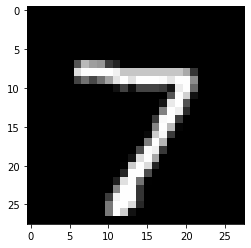

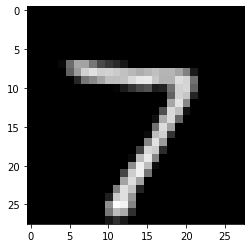

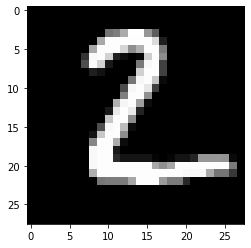

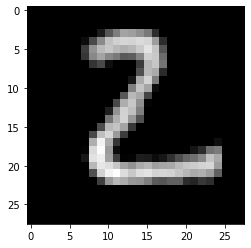

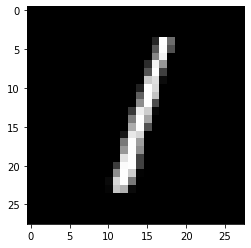

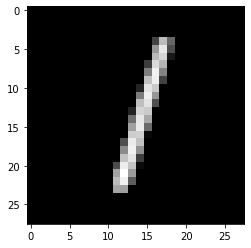

In [94]:
gen_images = model.predict(test_X)
 
for i in range(3):
    plt.imshow(test_X[i].reshape(28, 28)), plt.gray(), plt.show()
    plt.imshow(gen_images[i].reshape(28, 28)), plt.gray(), plt.show()

In [95]:
np.shape(test_y)

(10000,)

In [106]:
import keras.backend as K

#function means input goes into the first layer of the model and output is the compressed layer of the model
#function can then be applied to any data with 97x97x1

encoding_lay = 5
encod_func = K.function([model.layers[0].input], [model.layers[encoding_lay].output])
encoding = encod_func([test_X])[0]
 
#flatten compressed representation to 1 dimensional array
encoding = encoding.reshape(10000,20)

In [107]:
from sklearn.cluster import KMeans

km = KMeans(n_clusters=10, init='random')

y_km = km.fit_predict(encoding)

In [108]:
test_y[:10]

array([7, 2, 1, 0, 4, 1, 4, 9, 5, 9], dtype=uint8)

In [109]:
from sklearn.metrics import accuracy_score
accuracy_score(y_km.tolist(), test_y)

0.0909

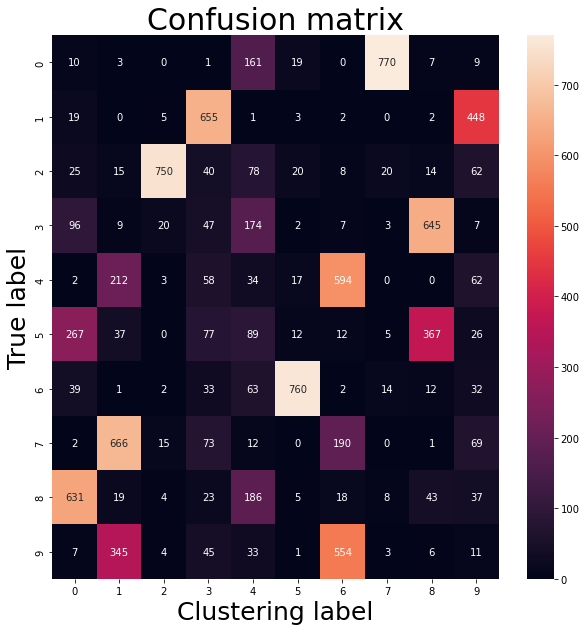

In [111]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

cm = confusion_matrix(test_y, y_km)
plt.figure(figsize=(10, 10))
sns.heatmap(cm, annot=True, fmt="d")
plt.title("Confusion matrix", fontsize=30)
plt.ylabel('True label', fontsize=25)
plt.xlabel('Clustering label', fontsize=25)
plt.show()

It doesn't work for MNIST either...

## Try supervised learning now to see if encoding helps

## Variational Autoencoders

*From https://keras.io/examples/generative/vae/*

In [21]:
import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

In [22]:
class Sampling(layers.Layer):
    """Uses (z_mean, z_log_var) to sample z, the vector encoding a digit."""

    def call(self, inputs):
        z_mean, z_log_var = inputs
        batch = tf.shape(z_mean)[0]
        dim = tf.shape(z_mean)[1]
        epsilon = tf.keras.backend.random_normal(shape=(batch, dim))
        return z_mean + tf.exp(0.5 * z_log_var) * epsilon

In [39]:
latent_dim = 2

encoder_inputs = keras.Input(shape=(97, 97, 1))
x = layers.Conv2D(32, 3, activation="relu", strides=2, padding="same")(encoder_inputs)
x = layers.Conv2D(64, 3, activation="relu", strides=2, padding="same")(x)
x = layers.Flatten()(x)
x = layers.Dense(16, activation="relu")(x)
z_mean = layers.Dense(latent_dim, name="z_mean")(x)
z_log_var = layers.Dense(latent_dim, name="z_log_var")(x)
z = Sampling()([z_mean, z_log_var])
encoder = keras.Model(encoder_inputs, [z_mean, z_log_var, z], name="encoder")
encoder.summary()

Model: "encoder"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_7 (InputLayer)           [(None, 97, 97, 1)]  0           []                               
                                                                                                  
 conv2d_6 (Conv2D)              (None, 49, 49, 32)   320         ['input_7[0][0]']                
                                                                                                  
 conv2d_7 (Conv2D)              (None, 25, 25, 64)   18496       ['conv2d_6[0][0]']               
                                                                                                  
 flatten_3 (Flatten)            (None, 40000)        0           ['conv2d_7[0][0]']               
                                                                                            

In [40]:
latent_inputs = keras.Input(shape=(latent_dim,))
x = layers.Dense(7 * 7 * 64, activation="relu")(latent_inputs)
x = layers.Reshape((7, 7, 64))(x)
x = layers.Conv2DTranspose(64, 3, activation="relu", strides=2, padding="same")(x)
x = layers.Conv2DTranspose(32, 3, activation="relu", strides=2, padding="same")(x)
decoder_outputs = layers.Conv2DTranspose(1, 3, activation="sigmoid", padding="same")(x)
decoder = keras.Model(latent_inputs, decoder_outputs, name="decoder")
decoder.summary()

Model: "decoder"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_8 (InputLayer)        [(None, 2)]               0         
                                                                 
 dense_7 (Dense)             (None, 3136)              9408      
                                                                 
 reshape_3 (Reshape)         (None, 7, 7, 64)          0         
                                                                 
 conv2d_transpose_9 (Conv2DT  (None, 14, 14, 64)       36928     
 ranspose)                                                       
                                                                 
 conv2d_transpose_10 (Conv2D  (None, 28, 28, 32)       18464     
 Transpose)                                                      
                                                                 
 conv2d_transpose_11 (Conv2D  (None, 28, 28, 1)        289 

In [25]:
class VAE(keras.Model):
    def __init__(self, encoder, decoder, **kwargs):
        super(VAE, self).__init__(**kwargs)
        self.encoder = encoder
        self.decoder = decoder
        self.total_loss_tracker = keras.metrics.Mean(name="total_loss")
        self.reconstruction_loss_tracker = keras.metrics.Mean(
            name="reconstruction_loss"
        )
        self.kl_loss_tracker = keras.metrics.Mean(name="kl_loss")

    @property
    def metrics(self):
        return [
            self.total_loss_tracker,
            self.reconstruction_loss_tracker,
            self.kl_loss_tracker,
        ]

    def train_step(self, data):
        with tf.GradientTape() as tape:
            z_mean, z_log_var, z = self.encoder(data)
            reconstruction = self.decoder(z)
            reconstruction_loss = tf.reduce_mean(
                tf.reduce_sum(
                    keras.losses.binary_crossentropy(data, reconstruction), axis=(1, 2)
                )
            )
            kl_loss = -0.5 * (1 + z_log_var - tf.square(z_mean) - tf.exp(z_log_var))
            kl_loss = tf.reduce_mean(tf.reduce_sum(kl_loss, axis=1))
            total_loss = reconstruction_loss + kl_loss
        grads = tape.gradient(total_loss, self.trainable_weights)
        self.optimizer.apply_gradients(zip(grads, self.trainable_weights))
        self.total_loss_tracker.update_state(total_loss)
        self.reconstruction_loss_tracker.update_state(reconstruction_loss)
        self.kl_loss_tracker.update_state(kl_loss)
        return {
            "loss": self.total_loss_tracker.result(),
            "reconstruction_loss": self.reconstruction_loss_tracker.result(),
            "kl_loss": self.kl_loss_tracker.result(),
        }

In [26]:
(x_train, _), (x_test, _) = keras.datasets.mnist.load_data()
mnist_digits = np.concatenate([x_train, x_test], axis=0)
mnist_digits = np.expand_dims(mnist_digits, -1).astype("float32") / 255

vae = VAE(encoder, decoder)
vae.compile(optimizer=keras.optimizers.Adam())
vae.fit(mnist_digits, epochs=5, batch_size=128)

Epoch 1/5
547/547 [==============================] - 12s 21ms/step - loss: 263.2696 - reconstruction_loss: 214.3297 - kl_loss: 2.1192
Epoch 2/5
547/547 [==============================] - 12s 22ms/step - loss: 192.9377 - reconstruction_loss: 188.1091 - kl_loss: 3.0380
Epoch 3/5
547/547 [==============================] - 12s 22ms/step - loss: 180.7543 - reconstruction_loss: 169.8018 - kl_loss: 4.9675
Epoch 4/5
547/547 [==============================] - 12s 22ms/step - loss: 166.0281 - reconstruction_loss: 158.8833 - kl_loss: 5.7952
Epoch 5/5
547/547 [==============================] - 12s 22ms/step - loss: 161.7262 - reconstruction_loss: 155.1443 - kl_loss: 6.0151


In [32]:
np.shape(x_train)

(60000, 28, 28)

In [34]:
vae.encoder.predict(x_train)[1]

array([[-420.79712 , -348.07443 ],
       [ -47.602955, -194.7209  ],
       [-459.0341  , -239.56696 ],
       ...,
       [-382.26965 , -353.82184 ],
       [ -97.25618 , -222.65985 ],
       [-352.08612 , -319.22522 ]], dtype=float32)

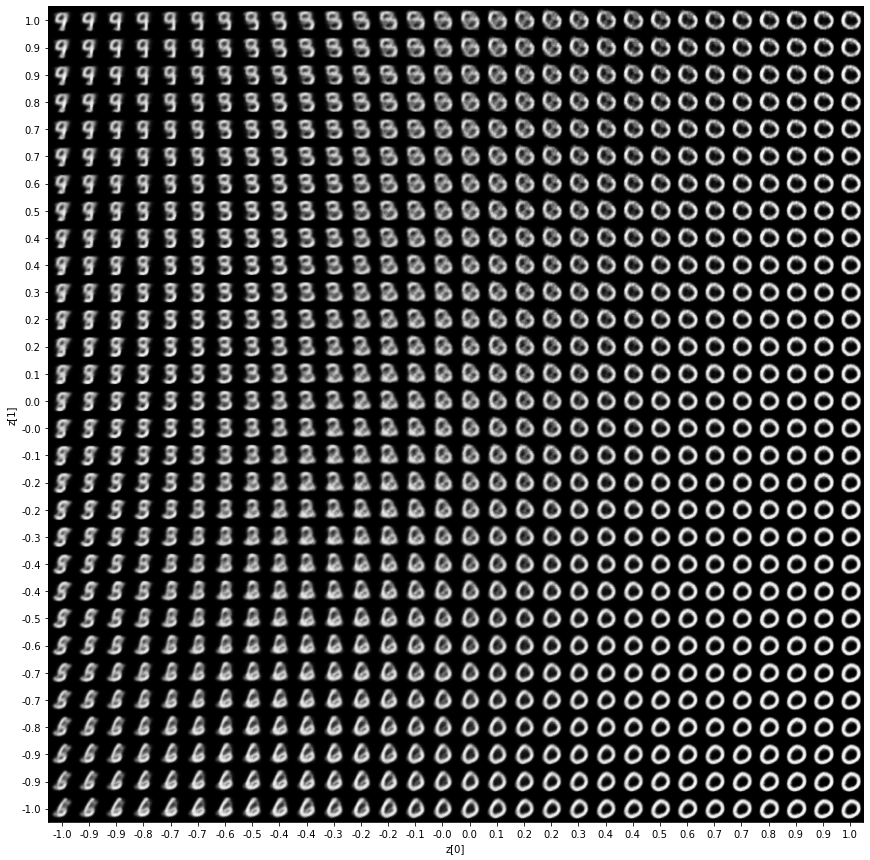

In [37]:
import matplotlib.pyplot as plt


def plot_latent_space(vae, n=30, figsize=15):
    # display a n*n 2D manifold of digits
    digit_size = 28
    scale = 1.0
    figure = np.zeros((digit_size * n, digit_size * n))
    # linearly spaced coordinates corresponding to the 2D plot
    # of digit classes in the latent space
    grid_x = np.linspace(-scale, scale, n)
    grid_y = np.linspace(-scale, scale, n)[::-1]

    for i, yi in enumerate(grid_y):
        for j, xi in enumerate(grid_x):
            z_sample = np.array([[xi, yi]])
            x_decoded = vae.decoder.predict(z_sample)
            digit = x_decoded[0].reshape(digit_size, digit_size)
            figure[
                i * digit_size : (i + 1) * digit_size,
                j * digit_size : (j + 1) * digit_size,
            ] = digit

    plt.figure(figsize=(figsize, figsize))
    start_range = digit_size // 2
    end_range = n * digit_size + start_range
    pixel_range = np.arange(start_range, end_range, digit_size)
    sample_range_x = np.round(grid_x, 1)
    sample_range_y = np.round(grid_y, 1)
    plt.xticks(pixel_range, sample_range_x)
    plt.yticks(pixel_range, sample_range_y)
    plt.xlabel("z[0]")
    plt.ylabel("z[1]")
    plt.imshow(figure, cmap="Greys_r")
    plt.show()


plot_latent_space(vae)

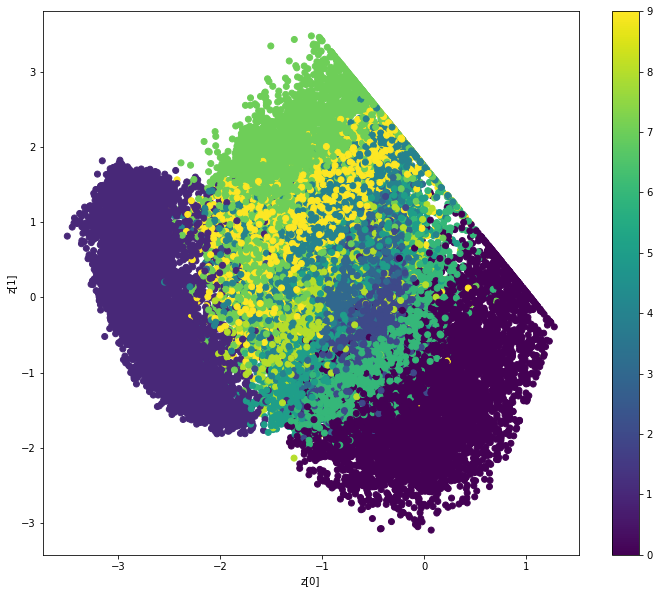

In [38]:
def plot_label_clusters(vae, dat, labs):
    # display a 2D plot of the digit classes in the latent space
    z_mean, _, _ = vae.encoder.predict(dat)
    plt.figure(figsize=(12, 10))
    plt.scatter(z_mean[:, 0], z_mean[:, 1], c=labs)
    plt.colorbar()
    plt.xlabel("z[0]")
    plt.ylabel("z[1]")
    plt.show()


(x_train, y_train), _ = keras.datasets.mnist.load_data()
x_train = np.expand_dims(x_train, -1).astype("float32") / 255

plot_label_clusters(vae, x_train, y_train)

## Trying other frameworks

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
%matplotlib inline

from sklearn.model_selection import train_test_split
import tensorflow as tf
from sklearn.utils import shuffle

In [2]:
C170_dat, F170_dat = np.load('data_old/C_170keV.npy'), np.load('data_old/F_170keV.npy')

In [3]:
data, labels = [],[]
Csum, Fsum = [],[]

for i in range(len(C170_dat)):
    data.append(C170_dat[i])
    labels.append(1)
    Csum.append(np.sum(C170_dat[i]))

for i in range(len(F170_dat)):
    data.append(F170_dat[i])
    labels.append(0)
    Fsum.append(np.sum(F170_dat[i]))

In [4]:
data -= np.mean(data)
data/=np.std(data)

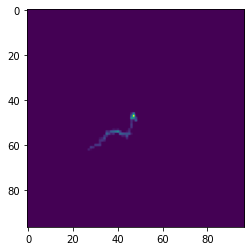

In [5]:
plt.imshow(data[0])

In [6]:
np.max(data)

138.15771374336663

In [7]:
data/=np.max(data)

In [8]:
x_train, x_test, y_train, y_test = train_test_split(data, labels, test_size=0.3, random_state=42)

In [9]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import tensorflow as tf

from sklearn.metrics import accuracy_score, precision_score, recall_score
from sklearn.model_selection import train_test_split
from tensorflow.keras import layers, losses
from tensorflow.keras.datasets import fashion_mnist
from tensorflow.keras.models import Model

In [10]:
# (x_train, _), (x_test, _) = fashion_mnist.load_data()

# x_train = x_train.astype('float32') / 255.
# x_test = x_test.astype('float32') / 255.

# print (x_train.shape)
# print (x_test.shape)

In [11]:
latent_dim = 64 

class Autoencoder(Model):
    def __init__(self, latent_dim):
        super(Autoencoder, self).__init__()
        self.latent_dim = latent_dim   
        self.encoder = tf.keras.Sequential([
          layers.Flatten(),
          layers.Dense(latent_dim, activation='relu'),
        ])
        self.decoder = tf.keras.Sequential([
          layers.Dense(784, activation='sigmoid'),
          layers.Reshape((28, 28))
        ])

    def call(self, x):
        encoded = self.encoder(x)
        decoded = self.decoder(encoded)
        return decoded

autoencoder = Autoencoder(latent_dim)

2022-05-27 11:31:58.958397: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:936] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-05-27 11:32:00.148784: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudnn.so.8'; dlerror: libcudnn.so.8: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: /vols/software/cuda/latest/CentOS7/lib64
2022-05-27 11:32:00.148824: W tensorflow/core/common_runtime/gpu/gpu_device.cc:1850] Cannot dlopen some GPU libraries. Please make sure the missing libraries mentioned above are installed properly if you would like to use GPU. Follow the guide at https://www.tensorflow.org/install/gpu for how to download and setup the required libraries for your platform.
Skipping registering GPU devices...
2022-05-27 11:32:00.149623: I tensorflow/core/platform/cpu_feature_guard.cc:151] This TensorFlow binary i

In [12]:
autoencoder.summary()

ValueError: This model has not yet been built. Build the model first by calling `build()` or by calling the model on a batch of data.

In [ ]:
autoencoder.compile(optimizer='adam', loss=losses.MeanSquaredError())

In [ ]:
autoencoder.fit(x_train, x_train,
                epochs=10,
                shuffle=True,
                validation_data=(x_test, x_test))

In [ ]:
encoded_imgs = autoencoder.encoder(x_test).numpy()
decoded_imgs = autoencoder.decoder(encoded_imgs).numpy()

In [ ]:
n = 10
plt.figure(figsize=(20, 4))
for i in range(n):
    # display original
    ax = plt.subplot(2, n, i + 1)
    plt.imshow(x_test[i])
    plt.title("original")
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # display reconstruction
    ax = plt.subplot(2, n, i + 1 + n)
    plt.imshow(decoded_imgs[i])
    plt.title("reconstructed")
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()

# Semi-Supervised Learning

## Normal GAN

Below is just running the tensorflow example to help understand it.

In [85]:
import tensorflow as tf
from tensorflow.keras import layers
import matplotlib.pyplot as plt
import numpy as np
import time
import os

from IPython import display

In [86]:
(train_images, train_labels), (_, _) = tf.keras.datasets.mnist.load_data()

In [87]:
np.shape(train_images)

(60000, 28, 28)

In [88]:
train_images = train_images.reshape(train_images.shape[0], 28, 28, 1).astype('float32')
train_images = (train_images - 127.5) / 127.5  # Normalize the images to [-1, 1]

In [89]:
BUFFER_SIZE = 60000
BATCH_SIZE = 256

In [90]:
# Batch and shuffle the data
train_dataset = tf.data.Dataset.from_tensor_slices(train_images).shuffle(BUFFER_SIZE).batch(BATCH_SIZE)

The `assert` part just returns an error if the output does not have the specified shape.

In [91]:
def make_generator_model():
    model = tf.keras.Sequential()
    model.add(layers.Dense(7*7*256, use_bias=False, input_shape=(100,)))
    model.add(layers.BatchNormalization())
    model.add(layers.LeakyReLU())

    model.add(layers.Reshape((7, 7, 256)))
    assert model.output_shape == (None, 7, 7, 256)  # Note: None is the batch size

    model.add(layers.Conv2DTranspose(128, (5, 5), strides=(1, 1), padding='same', use_bias=False))
    assert model.output_shape == (None, 7, 7, 128)
    model.add(layers.BatchNormalization())
    model.add(layers.LeakyReLU())

    model.add(layers.Conv2DTranspose(64, (5, 5), strides=(2, 2), padding='same', use_bias=False))
    assert model.output_shape == (None, 14, 14, 64)
    model.add(layers.BatchNormalization())
    model.add(layers.LeakyReLU())

    model.add(layers.Conv2DTranspose(1, (5, 5), strides=(2, 2), padding='same', use_bias=False, activation='tanh'))
    assert model.output_shape == (None, 28, 28, 1)

    return model

`tf.random.normal` outputs random values from normal distribution (default mean is 0 and std dev is 1) with the specified shape (in this case [1, 100]).

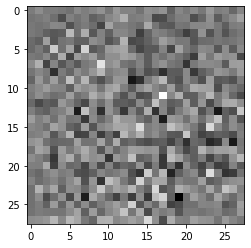

In [92]:
generator = make_generator_model()

noise = tf.random.normal([1, 100])
generated_image = generator(noise, training=False)

plt.imshow(generated_image[0, :, :, 0], cmap='gray')

In [93]:
def make_discriminator_model():
    model = tf.keras.Sequential()
    model.add(layers.Conv2D(64, (5, 5), strides=(2, 2), padding='same',
                                     input_shape=[28, 28, 1]))
    model.add(layers.LeakyReLU())
    model.add(layers.Dropout(0.3))

    model.add(layers.Conv2D(128, (5, 5), strides=(2, 2), padding='same'))
    model.add(layers.LeakyReLU())
    model.add(layers.Dropout(0.3))

    model.add(layers.Flatten())
    model.add(layers.Dense(1))

    return model

In [94]:
discriminator = make_discriminator_model()
decision = discriminator(generated_image)
print (decision)

tf.Tensor([[0.00056448]], shape=(1, 1), dtype=float32)


In [95]:
# This method returns a helper function to compute cross entropy loss
cross_entropy = tf.keras.losses.BinaryCrossentropy(from_logits=True)

`tf.ones_like` creates a tensor of all ones that has the same shape as the input.

In [96]:
def discriminator_loss(real_output, fake_output):
    real_loss = cross_entropy(tf.ones_like(real_output), real_output)
    fake_loss = cross_entropy(tf.zeros_like(fake_output), fake_output)
    total_loss = real_loss + fake_loss
    return total_loss

In [97]:
def generator_loss(fake_output):
    return cross_entropy(tf.ones_like(fake_output), fake_output)

In [98]:
generator_optimizer = tf.keras.optimizers.Adam(1e-4)
discriminator_optimizer = tf.keras.optimizers.Adam(1e-4)

In [99]:
checkpoint_dir = './training_checkpoints'
checkpoint_prefix = os.path.join(checkpoint_dir, "ckpt")
checkpoint = tf.train.Checkpoint(generator_optimizer=generator_optimizer,
                                 discriminator_optimizer=discriminator_optimizer,
                                 generator=generator,
                                 discriminator=discriminator)

In [100]:
EPOCHS = 50
noise_dim = 100
num_examples_to_generate = 16

# You will reuse this seed overtime (so it's easier)
# to visualize progress in the animated GIF)
seed = tf.random.normal([num_examples_to_generate, noise_dim])

In [101]:
# Notice the use of `tf.function`
# This annotation causes the function to be "compiled".
@tf.function
def train_step(images):
    noise = tf.random.normal([BATCH_SIZE, noise_dim])

    with tf.GradientTape() as gen_tape, tf.GradientTape() as disc_tape:
        generated_images = generator(noise, training=True)

        real_output = discriminator(images, training=True)
        fake_output = discriminator(generated_images, training=True)

        gen_loss = generator_loss(fake_output)
        disc_loss = discriminator_loss(real_output, fake_output)

    gradients_of_generator = gen_tape.gradient(gen_loss, generator.trainable_variables)
    gradients_of_discriminator = disc_tape.gradient(disc_loss, discriminator.trainable_variables)

    generator_optimizer.apply_gradients(zip(gradients_of_generator, generator.trainable_variables))
    discriminator_optimizer.apply_gradients(zip(gradients_of_discriminator, discriminator.trainable_variables))

In [102]:
def train(dataset, epochs):
    for epoch in range(epochs):
        start = time.time()

        for image_batch in dataset:
            train_step(image_batch)

        # Produce images for the GIF as you go
        display.clear_output(wait=True)
        generate_and_save_images(generator,
                                 epoch + 1,
                                 seed)

        # Save the model every 15 epochs
        if (epoch + 1) % 15 == 0:
            checkpoint.save(file_prefix = checkpoint_prefix)

        print ('Time for epoch {} is {} sec'.format(epoch + 1, time.time()-start))

    # Generate after the final epoch
    display.clear_output(wait=True)
    generate_and_save_images(generator,
                             epochs,
                             seed)

In [103]:
def generate_and_save_images(model, epoch, test_input):
    # Notice `training` is set to False.
    # This is so all layers run in inference mode (batchnorm).
    predictions = model(test_input, training=False)

    fig = plt.figure(figsize=(4, 4))

    for i in range(predictions.shape[0]):
        plt.subplot(4, 4, i+1)
        plt.imshow(predictions[i, :, :, 0] * 127.5 + 127.5, cmap='gray')
        plt.axis('off')

#   plt.savefig('image_at_epoch_{:04d}.png'.format(epoch))
    plt.show()

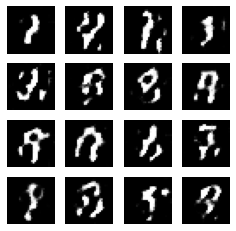

Time for epoch 16 is 39.810293436050415 sec


KeyboardInterrupt: 

In [104]:
train(train_dataset, EPOCHS)

## Semi-supervised GAN

In [68]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
%matplotlib inline

from sklearn.model_selection import train_test_split
import tensorflow as tf
from sklearn.utils import shuffle

In [69]:
C170_dat, F170_dat = np.load('data_old/C_170keV.npy'), np.load('data_old/F_170keV.npy')

In [70]:
data, labels = [],[]
Csum, Fsum = [],[]

for i in range(len(C170_dat)):
    data.append(C170_dat[i])
    labels.append(1)
    Csum.append(np.sum(C170_dat[i]))

for i in range(len(F170_dat)):
    data.append(F170_dat[i])
    labels.append(0)
    Fsum.append(np.sum(F170_dat[i]))

In [71]:
np.max(data)

663.0

In [72]:
train_data, test_data, train_labels, test_labels = train_test_split(data, labels, test_size=0.3, random_state=42)

In [73]:
# data -= np.mean(data)
# data/=np.std(data)

In [74]:
import tensorflow as tf
# example of defining semi-supervised discriminator model
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Conv2D
from tensorflow.keras.layers import LeakyReLU
from tensorflow.keras.layers import Dropout
from tensorflow.keras.layers import Flatten
from tensorflow.keras.layers import Reshape
from tensorflow.keras.layers import Conv2DTranspose
from tensorflow.keras.layers import Resizing
from tensorflow.keras.optimizers import Adam
from keras.utils.vis_utils import plot_model
from numpy.random import randint 
 
# define the standalone supervised and unsupervised discriminator models
def define_discriminator(in_shape=(97,97,1), n_classes=2):
    # image input
    in_image = Input(shape=in_shape)
    # downsample
    fe = Conv2D(128, (3,3), strides=(2,2), padding='same')(in_image)
    fe = LeakyReLU(alpha=0.2)(fe)
    # downsample
    fe = Conv2D(128, (3,3), strides=(2,2), padding='same')(fe)
    fe = LeakyReLU(alpha=0.2)(fe)
    # downsample
    fe = Conv2D(128, (3,3), strides=(2,2), padding='same')(fe)
    fe = LeakyReLU(alpha=0.2)(fe)
    # flatten feature maps
    fe = Flatten()(fe)
    # dropout
    fe = Dropout(0.4)(fe)
    # unsupervised output
    d_out_layer = Dense(1, activation='sigmoid')(fe)
    # define and compile unsupervised discriminator model
    d_model = Model(in_image, d_out_layer)
    d_model.compile(loss='binary_crossentropy', optimizer=Adam(lr=0.0002, beta_1=0.5))
    # supervised output
    c_out_layer = Dense(n_classes, activation='softmax')(fe)
    # define and compile supervised discriminator model
    c_model = Model(in_image, c_out_layer)
    c_model.compile(loss='sparse_categorical_crossentropy', optimizer=Adam(lr=0.0002, beta_1=0.5), \
                    metrics=['accuracy'])
    return d_model, c_model
 
# create model
d_model, c_model = define_discriminator()
# plot the model
# plot_model(d_model, to_file='discriminator1_plot.png', show_shapes=True, show_layer_names=True)
# plot_model(c_model, to_file='discriminator2_plot.png', show_shapes=True, show_layer_names=True)

In [75]:
def define_generator(latent_dim):
    # image generator input
    in_lat = Input(shape=(latent_dim,))
    # foundation for 7x7 image
    n_nodes = 128 * 7 * 7
    gen = Dense(n_nodes)(in_lat)
    gen = LeakyReLU(alpha=0.2)(gen)
    gen = Reshape((7, 7, 128))(gen)
    # upsample to 14x14
    gen = Conv2DTranspose(128, (4,4), strides=(2,2), padding='same')(gen)
    gen = LeakyReLU(alpha=0.2)(gen)
    # upsample to 28x28
    gen = Conv2DTranspose(128, (4,4), strides=(2,2), padding='same')(gen)
    gen = LeakyReLU(alpha=0.2)(gen)
    
    gen = Conv2DTranspose(128, (4,4), strides=(2,2), padding='same')(gen)
    gen = LeakyReLU(alpha=0.2)(gen)
    
    gen = Conv2DTranspose(128, (4,4), strides=(2,2), padding='same')(gen)
    gen = LeakyReLU(alpha=0.2)(gen)
    
    gen = Resizing(97,97)(gen)
    # output
    out_layer = Conv2D(1, (7,7), activation='tanh', padding='same')(gen)
    # define model
    model = Model(in_lat, out_layer)
    return model

padding = same means input size will be same as output size

In [76]:
dgen=define_generator(100)
dgen.summary()

Model: "model_30"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_18 (InputLayer)       [(None, 100)]             0         
                                                                 
 dense_26 (Dense)            (None, 6272)              633472    
                                                                 
 leaky_re_lu_67 (LeakyReLU)  (None, 6272)              0         
                                                                 
 reshape_8 (Reshape)         (None, 7, 7, 128)         0         
                                                                 
 conv2d_transpose_32 (Conv2D  (None, 14, 14, 128)      262272    
 Transpose)                                                      
                                                                 
 leaky_re_lu_68 (LeakyReLU)  (None, 14, 14, 128)       0         
                                                          

In [77]:
# define the combined generator and discriminator model, for updating the generator
def define_gan(g_model, d_model):
    # make weights in the discriminator not trainable
    d_model.trainable = False
    # connect image output from generator as input to discriminator
    gan_output = d_model(g_model.output)
    # define gan model as taking noise and outputting a classification
    model = Model(g_model.input, gan_output)
    # compile model
    opt = Adam(lr=0.0002, beta_1=0.5)
    model.compile(loss='binary_crossentropy', optimizer=opt)
    return model

In [78]:
# # load the images
# def load_real_samples():
#     # load dataset
#     (trainX, trainy), (_, _) = load_data()
#     # expand to 3d, e.g. add channels
#     X = expand_dims(trainX, axis=-1)
#     # convert from ints to floats
#     X = X.astype('float32')
#     # scale from [0,255] to [-1,1]
#     X = (X - 127.5) / 127.5
#     print(X.shape, trainy.shape)
#     return [X, trainy]

# load the images
def load_real_samples():
    # load dataset
    trainX, trainy = np.array(train_data), np.array(train_labels)
    # expand to 3d, e.g. add channels
    X = np.expand_dims(trainX, axis=-1)
    # convert from ints to floats
    X = X.astype('float32')
    # scale from [0,255] to [-1,1]
    X = (X - (np.max(data)/2)) / (np.max(data)/2)
    print(X.shape, trainy.shape)
    return [X, trainy]

In [79]:
# select a supervised subset of the dataset, ensures classes are balanced
def select_supervised_samples(dataset, n_samples=100, n_classes=2):
    X, y = dataset
    X_list, y_list = list(), list()
    n_per_class = int(n_samples / n_classes)
    for i in range(n_classes):
        # get all images for this class
        X_with_class = X[y == i]
        # choose random instances
        ix = randint(0, len(X_with_class), n_per_class)
        # add to list
        [X_list.append(X_with_class[j]) for j in ix]
        [y_list.append(i) for j in ix]
    return np.asarray(X_list), np.asarray(y_list)

In [80]:
# select real samples
def generate_real_samples(dataset, n_samples):
    # split into images and labels
    images, labels = dataset
    # choose random instances
    ix = randint(0, images.shape[0], n_samples)
    # select images and labels
    X, labels = images[ix], labels[ix]
    # generate class labels
    y = np.ones((n_samples, 1))
    return [X, labels], y

In [81]:
# generate points in latent space as input for the generator
def generate_latent_points(latent_dim, n_samples):
    # generate points in the latent space
    z_input = np.random.randn(latent_dim * n_samples)
    # reshape into a batch of inputs for the network
    z_input = z_input.reshape(n_samples, latent_dim)
    return z_input
 
# use the generator to generate n fake examples, with class labels
def generate_fake_samples(generator, latent_dim, n_samples):
    # generate points in latent space
    z_input = generate_latent_points(latent_dim, n_samples)
    # predict outputs
    images = generator.predict(z_input)
    # create class labels
    y = np.zeros((n_samples, 1))
    return images, y

In [82]:
# generate samples and save as a plot and save the model
def summarize_performance(step, g_model, c_model, latent_dim, dataset, n_samples=100):
    # prepare fake examples
    X, _ = generate_fake_samples(g_model, latent_dim, n_samples)
    # scale from [-1,1] to [0,1]
    X = (X + 1) / 2.0
    # plot images
    for i in range(100):
        # define subplot
        pyplot.subplot(10, 10, 1 + i)
        # turn off axis
        pyplot.axis('off')
        # plot raw pixel data
        pyplot.imshow(X[i, :, :, 0], cmap='gray_r')
    # save plot to file
    filename1 = 'generated_plot_%04d.png' % (step+1)
    pyplot.savefig(filename1)
    pyplot.close()
    # evaluate the classifier model
    X, y = dataset
    _, acc = c_model.evaluate(X, y, verbose=0)
    print('Classifier Accuracy: %.3f%%' % (acc * 100))
    # save the generator model
    filename2 = 'g_model_%04d.h5' % (step+1)
    g_model.save(filename2)
    # save the classifier model
    filename3 = 'c_model_%04d.h5' % (step+1)
    c_model.save(filename3)
    print('>Saved: %s, %s, and %s' % (filename1, filename2, filename3))

In [83]:
# train the generator and discriminator
def train(g_model, d_model, c_model, gan_model, dataset, latent_dim, n_epochs=20, n_batch=100):
    # select supervised dataset
    X_sup, y_sup = select_supervised_samples(dataset)
    print(X_sup.shape, y_sup.shape)
    # calculate the number of batches per training epoch
    bat_per_epo = int(dataset[0].shape[0] / n_batch)
    # calculate the number of training iterations
    n_steps = bat_per_epo * n_epochs
    # calculate the size of half a batch of samples
    half_batch = int(n_batch / 2)
    print('n_epochs=%d, n_batch=%d, 1/2=%d, b/e=%d, steps=%d' % (n_epochs, n_batch, half_batch, bat_per_epo, n_steps))
    # manually enumerate epochs
    for i in range(n_steps):
        # update supervised discriminator (c)
        [Xsup_real, ysup_real], _ = generate_real_samples([X_sup, y_sup], half_batch)
        c_loss, c_acc = c_model.train_on_batch(Xsup_real, ysup_real)
        # update unsupervised discriminator (d)
        [X_real, _], y_real = generate_real_samples(dataset, half_batch)
        d_loss1 = d_model.train_on_batch(X_real, y_real)
        X_fake, y_fake = generate_fake_samples(g_model, latent_dim, half_batch)
        d_loss2 = d_model.train_on_batch(X_fake, y_fake)
        # update generator (g)
        X_gan, y_gan = generate_latent_points(latent_dim, n_batch), np.ones((n_batch, 1))
        g_loss = gan_model.train_on_batch(X_gan, y_gan)
        # summarize loss on this batch
        print('>%d, c[%.3f,%.0f], d[%.3f,%.3f], g[%.3f]' % (i+1, c_loss, c_acc*100, d_loss1, d_loss2, g_loss))
        # evaluate the model performance every so often
        if (i+1) % (bat_per_epo * 1) == 0:
            summarize_performance(i, g_model, c_model, latent_dim, dataset)

In [84]:
# size of the latent space
latent_dim = 100
# create the discriminator models
d_model, c_model = define_discriminator()
# create the generator
g_model = define_generator(latent_dim)
# create the gan
gan_model = define_gan(g_model, d_model)
# load image data
dataset = load_real_samples()
# train model
train(g_model, d_model, c_model, gan_model, dataset, latent_dim)

(7000, 97, 97, 1) (7000,)
(100, 97, 97, 1) (100,)
n_epochs=20, n_batch=100, 1/2=50, b/e=70, steps=1400
>1, c[0.691,50], d[0.664,0.695], g[0.692]
>2, c[0.713,48], d[0.492,0.697], g[0.691]
>3, c[0.685,50], d[0.322,0.702], g[0.686]
>4, c[0.750,50], d[0.201,0.711], g[0.678]
>5, c[0.697,52], d[0.101,0.736], g[0.656]
>6, c[0.715,48], d[0.055,0.791], g[0.614]
>7, c[0.676,52], d[0.040,0.917], g[0.546]
>8, c[0.742,48], d[0.062,1.078], g[0.501]
>9, c[0.698,50], d[0.135,1.203], g[0.477]
>10, c[0.713,50], d[0.271,1.153], g[0.505]
>11, c[0.705,48], d[0.410,1.012], g[0.560]
>12, c[0.693,56], d[0.500,0.902], g[0.605]
>13, c[0.693,50], d[0.561,0.850], g[0.634]
>14, c[0.711,44], d[0.606,0.795], g[0.662]
>15, c[0.698,44], d[0.630,0.774], g[0.666]
>16, c[0.694,48], d[0.637,0.767], g[0.662]
>17, c[0.688,60], d[0.635,0.764], g[0.664]
>18, c[0.690,54], d[0.648,0.752], g[0.670]
>19, c[0.706,44], d[0.650,0.754], g[0.670]
>20, c[0.694,50], d[0.656,0.745], g[0.671]
>21, c[0.692,54], d[0.664,0.738], g[0.676]
>22

NameError: name 'pyplot' is not defined